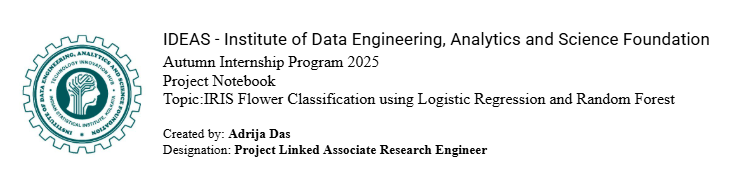

Submitted by:
**RAGENDU UMESH** ,Sree Sankara College, Kalady

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.It is one of the most famous datasets in machine learning. It contains measurements of 150 iris flowers from three different species:

1.Iris Setosa

2.Iris Versicolor

3.Iris Virginica


For each flower, we have 4 numerical features:

1.Sepal length (cm)

2.Sepal width (cm)

3.Petal length (cm)

4.Petal width (cm)

The goal is to build a classification model that can predict the species of an iris flower based on its features.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Loading and Visualization

In [2]:
# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [4]:
# Map numeric labels to species names
species_map = dict(zip(range(3), iris.target_names))
y = y.map(species_map)
# Combine for quick view
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Dataset info
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


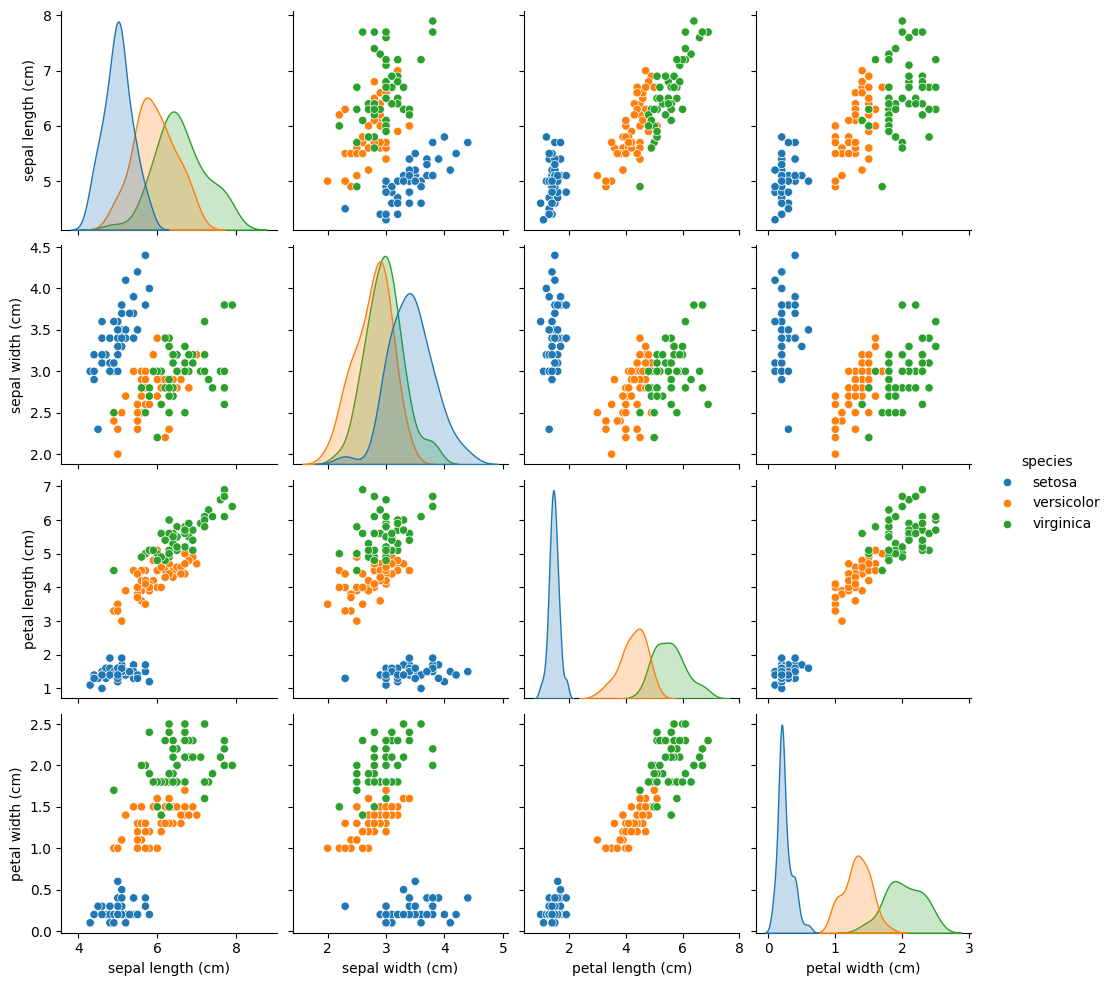

In [6]:
# Pairplot visualization
sns.pairplot(df, hue="species")
plt.show()

**Question 1**

 From the scatterplot/pairplot above which two features seem most useful for separating species?

 The most useful features for separating species are petal length and petal width. From the scatterplot, Setosa can be easily seperated from other two species in petal length and petal width. Versicolor and virginica overlap a bit but it always show distinct clusters along these two features. So petal length and petal width are more effective for separating species.

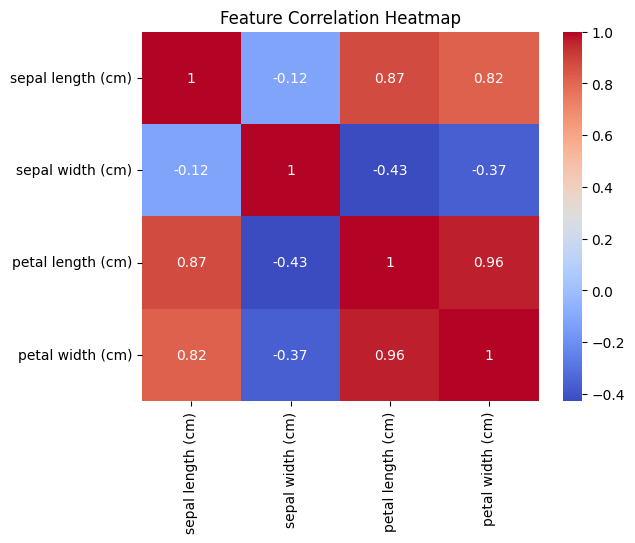

In [7]:
#Heat Map Visualisation
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


**Question 2**

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

Petal length and petal width are most correlated with a correlation of 0.96. These two features have a high positive correlation, that means as petal length increases, petal width also increases. One can predict the other.

# Train/Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 105
Test samples: 45


 **Question 3**.

  Why do we split the dataset into training and testing sets?

  In machine learning, we train a model on input data, the model learns pattern from this input data and then those patterns use to predict the target. Here we split the dataset into training and testing data. The model learns pattern from the training data and is then evaluated on unseen test data. This prevents overfitting and it predict accurate model.

# Logistic Regression
Logistic regression is a classification model that uses input variables to predict a categorical outcome variable that can take on one of a limited set of class values. A binomial logistic regression is limited to two binary output categories while a multinomial logistic regression allows for more than two classes. Examples of logistic regression include classifying a binary condition as “healthy” / “not healthy”, or an image as “bicycle” / “train” / “car” / “truck”. Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class.

Accuracy (Logistic Regression): 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



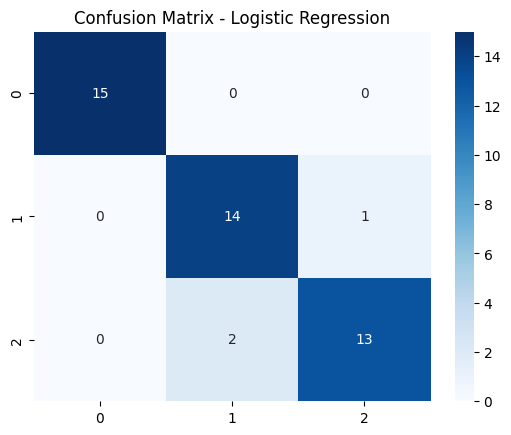

In [9]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Question 4.**

 Logistic Regression assumes a linear decision boundary. why?

 Logistic regression computes the probability of a class by using the logistic function applied to a linear combination of features. The term inside the logistic funcion is linear. And the decision boundary where probability = 0.5  is a straight line. Logistic regression can only separate classes with linear boundaries.

**Question 5.**

Do you think this assumption holds for the Iris dataset? Why or why not?

Cosidering this dataset, it has three features: Setosa, Versicolor, Virginica. Setosa has small petals and is linearly separable from other two features, so for setosa this assumption holds perfectly. But there is some overlap between versicolor and virginica, so a straight line can separate them fairly well. This means that assumption holds not perfectly for other two features.

# Random Forest
Random forest is a popular ensemble learning method for classification.Ensemble learning methods combine multiple machine learning (ML) algorithms to obtain a better model—the wisdom of crowds applied to data science. They’re based on the concept that a group of people with limited knowledge about a problem domain can collectively arrive at a better solution than a single person with greater knowledge.

Random forest is an ensemble of decision trees, a problem-solving metaphor that’s familiar to nearly everyone. Decision trees arrive at an answer by asking a series of true/false questions about elements in a data set. In the example below, to predict a person's income, a decision looks at variables (features) such as whether the person has a job (yes or no) and whether the person owns a house. In an algorithmic context, the machine continually searches for which feature allows the observations in a set to be split in such a way that the resulting groups are as different from each other as possible and the members of each distinct subgroup are as similar to each other as possible.

Each tree in a random forest randomly samples subsets of the training data in a process known as bootstrap aggregating (bagging). The model is fit to these smaller data sets and the predictions are aggregated. Several instances of the same data can be used repeatedly through replacement sampling, and the result is that trees that are not only trained on different sets of data, but also different features used to make decisions.



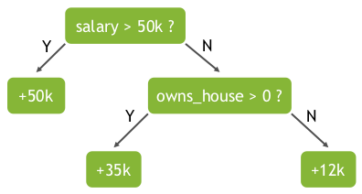
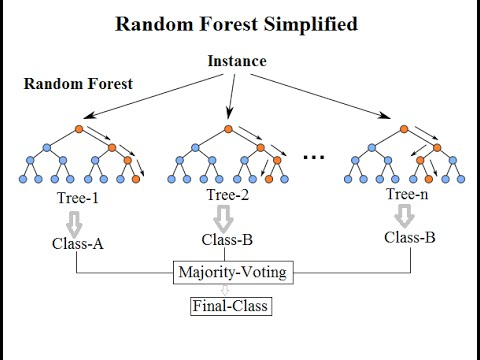

Accuracy (Random Forest): 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



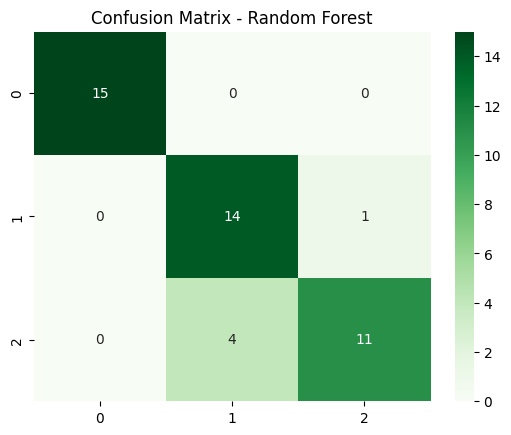

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

**Question 6**.

 If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

 In Random Forest, the parameter n_estimators means number of decision trees. By increasing the number of trees which makes the model more stable by reducing variance, which can slightly improve accuracy. For the Iris dataset, there is some overlap between versicolor and virginica features which causes misclassifications. Adding more trees may only improve small accuracy but it cannot solve overlap problem.

**Question 7**.

Between Logistic Regression and Random Forest, which model performed better? Why might that be?

Between the two models, Logistic Regression performed better compared to Random Forest. Here, the Logistic Regression model achieved 93% accuracy, which is slightly higher than the 89% accuracy of the Random Forest model. In logistic Regression, the classes are almost linearly separable, this will helps to classify most points correctly.

**Question 8**.

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

If we had a much larger dataset with noisy features, Random Forest would likely generalize better than Logistic Regression. This is because Random Forest uses multiple decision trees and combines their outputs, which helps it handle noise and complexity more effectively. With noisy data, Logistic Regression might difficult to find a clear boundary, while Random Forest can take useful patterns by averaging across many trees, making it more robust in such situations.

**Question 9.**

Run the Entire Notebook with this dataset separately http://archive.ics.uci.edu/dataset/174/parkinsons. Also Answer the above questions for this dataset too.

# Parkinsons dataset

The dataset used is the Parkinson’s Disease dataset containing biomedical voice measurements. Each record corresponds to a voice sample, with multiple features such as jitter, shimmer, fundamental frequency, and other frequency perturbation measures. The target variable indicates whether the subject has Parkinson’s Disease (1) or not (0).

# Features
name – Subject name/ID (not used for modeling).

MDVP:Fo(Hz) – Average fundamental frequency of the voice (in Hertz).

MDVP:Fhi(Hz) – Maximum fundamental frequency of the voice.

MDVP:Flo(Hz) – Minimum fundamental frequency of the voice.

MDVP:Jitter(%) – Measure of frequency variation in the voice signal (percentage).

MDVP:Jitter(Abs) – Absolute jitter; average absolute difference between consecutive pitch periods.

MDVP: RAP – Relative Average Perturbation; short-term variation in voice frequency.

MDVP: PPQ – Pitch Perturbation Quotient; another measure of pitch stability.

Jitter:DDP – Difference of differences of periods; another jitter-related feature.

MDVP:Shimmer – Measure of amplitude variation in the voice signal.

MDVP:Shimmer(dB) – Shimmer measured in decibels.

Shimmer: APQ3 – Three-point Amplitude Perturbation Quotient.

Shimmer: APQ5 – Five-point Amplitude Perturbation Quotient.

MDVP: APQ – Amplitude Perturbation Quotient (general).

Shimmer:DDA – Average absolute differences between consecutive differences of amplitude periods.

NHR – Noise-to-Harmonics Ratio; quantifies breathiness/hoarseness of voice.

HNR – Harmonics-to-Noise Ratio; higher values indicate clearer voice signals.

RPDE – Recurrence Period Density Entropy; nonlinear measure of signal complexity.

DFA – Detrended Fluctuation Analysis; measures fractal scaling properties of the voice signal.

spread1 – Nonlinear measure capturing variation in fundamental frequency.

spread2 – Another nonlinear measure related to fundamental frequency variability.

D2 – Correlation dimension; nonlinear dynamical complexity measure.

PPE – Pitch Period Entropy; measure of pitch variation/irregularity.

Target variable: status – Parkinson’s patient=1, healthy=0.

In [11]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#loading data
data=pd.read_csv("/content/parkinsons.data")
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [13]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [14]:
# dropping unwanted column
data = data.drop(columns=['name'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [16]:
data.isna().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


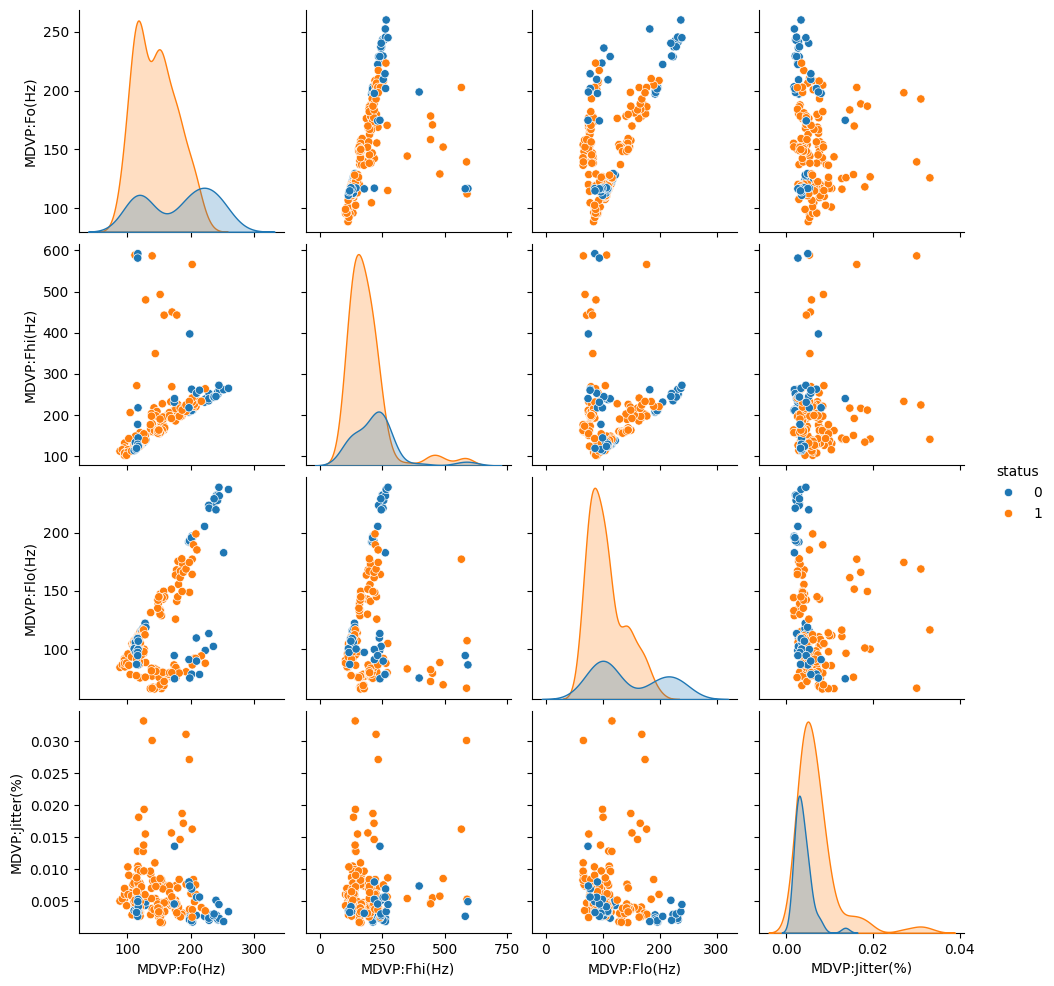

In [17]:
#pairplot
sns.pairplot(data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'status']],
             hue="status")
plt.show()

*Question 1*.

From the scatterplot/pairplot above which two features seem most useful for separating person who had Parkinson's disease or not?

From the scatterplot above, MDVP:Fo(Hz) and MDVP:Jitter(%) appear to be the most useful features for distinguishing between individuals with and without Parkinson’s disease, as patients with the disease generally show higher jitter values and more variation in fundamental frequency compared to healthy individuals.

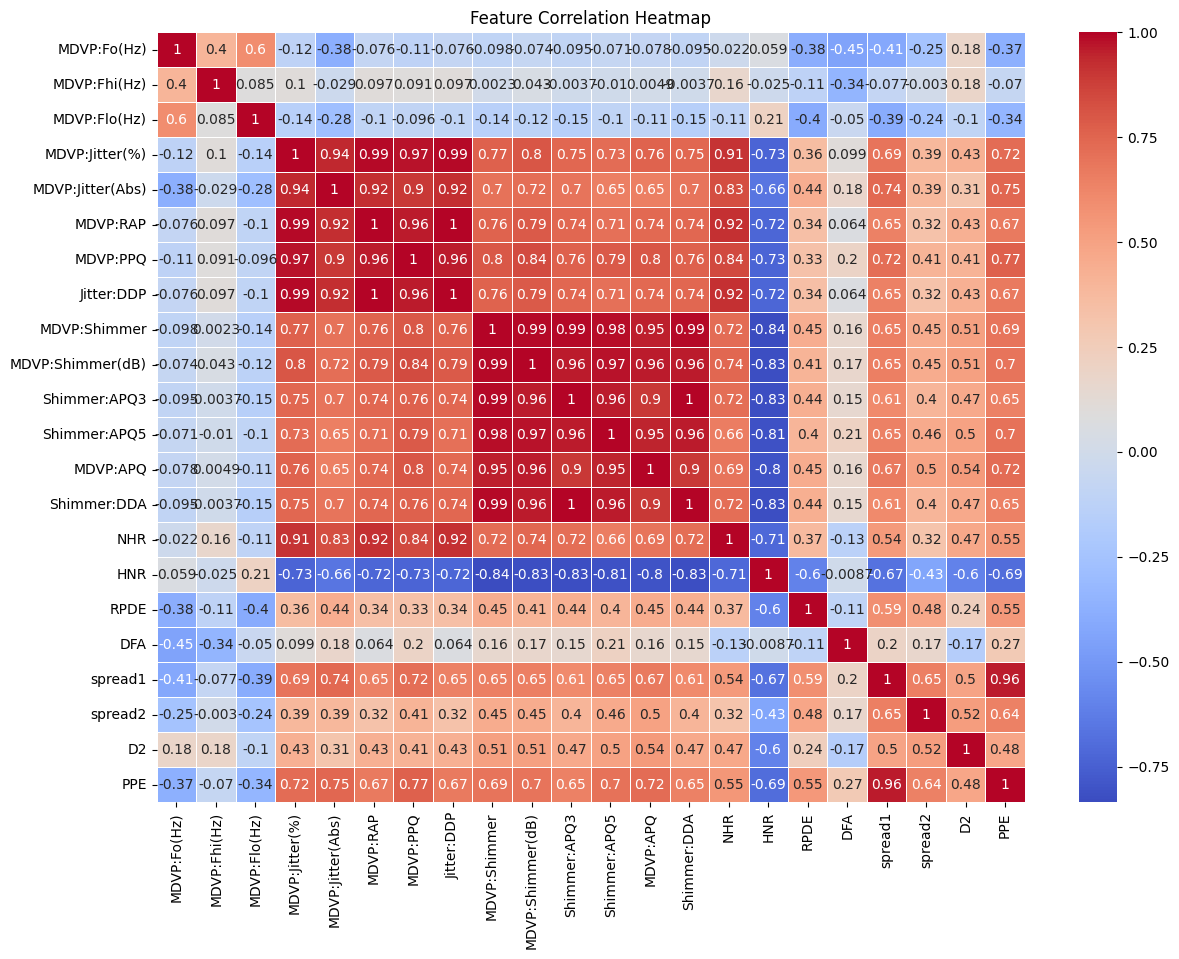

In [18]:
#Heat Map Visualisation
plt.figure(figsize=(14,10))
sns.heatmap(data.drop("status", axis=1).corr(), annot=True,linewidths=0.5, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

*Question 2*.

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

The most correlated pair of features is Jitter:DDP and MDVP:RAP & Shimmer:DDA and Shimmer:APQ3 with a correlation of 1. These pairs measure very similar properties of voice signal irregularities. High correlation (close to +1 or –1), it means they move together strongly. Here the features shows high positive correlation.

# Train test split

In [19]:
x=data.drop(['status'],axis=1)
y=data['status']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
print("Training samples:", x_train.shape[0])
print("Test samples:", x_test.shape[0])

Training samples: 136
Test samples: 59


*Question 3*.

Why do we split the dataset into training and testing sets?

In machine learning, we train a model on input data, the model learns pattern from this input data and then those patterns use to predict the target. Here we split the dataset into training and testing data. The model learns pattern from the training data and is then evaluated on unseen test data. This prevents overfitting and it predict accurate model.

# Logistic Regression

Accuracy (Logistic Regression): 0.847457627118644

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.87      0.93      0.90        44

    accuracy                           0.85        59
   macro avg       0.81      0.77      0.78        59
weighted avg       0.84      0.85      0.84        59



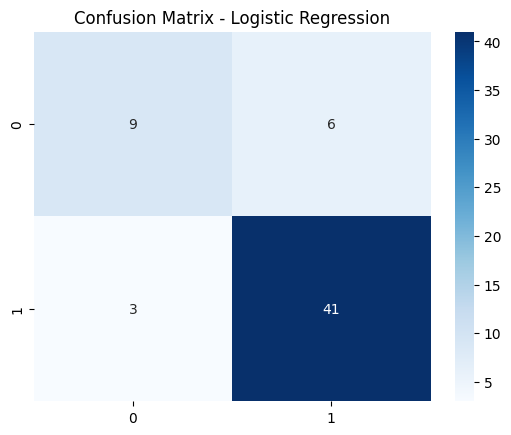

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(x_train, y_train)

y_pred_lr = log_reg.predict(x_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

*Question 4.*

 Logistic Regression assumes a linear decision boundary. why?

 Logistic Regression assumes a linear decision boundary because it models the relationship between the input features and logistic function applied to a linear combination of features. In simple terms, it tries to separate the classes by fitting a straight line in the feature space.

*Question 5.*

Do you think this assumption holds for the Parkinson dataset? Why or why not?

The linear decision boundary assumption does not fully hold for the Parkinson dataset because the features of healthy and Parkinson’s patients overlap heavily. The separation is not clear or straight-line based, making it too complex for Logistic Regression alone.

# Random Forest

Accuracy (Random Forest): 0.9322033898305084

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



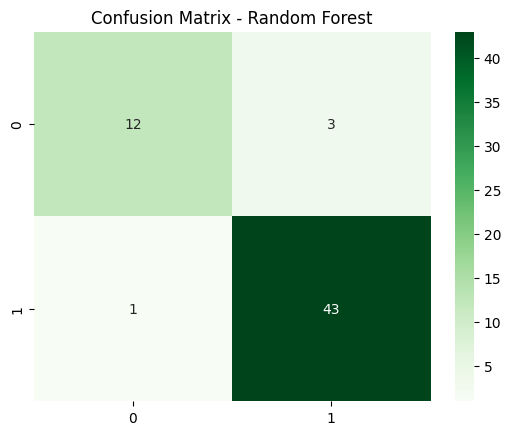

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

*Question 6*.

 If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

 If we increase the number of trees (n_estimators) in a Random Forest, the model generally becomes more stable and accurate because it reduces variance by averaging predictions from more trees. After adding a certain number of trees, the performance gain becomes minimal, and training time increases without much improvement in accuracy.

*Question 7*.

Between Logistic Regression and Random Forest, which model performed better?

Random Forest performed slightly better than Logistic Regression. Here, the Random Forest model achieved 93% accuracy, because it can model the more complex and noisy structure of the dataset which is slightly higher than the 84% accuracy of the Logistic Regression model.

*Question 8*.

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

If the dataset was much larger and had noisy features, Random Forest would usually perform better than Logistic Regression. That’s because Random Forest combines many trees, so even if some features are noisy, the overall model is less affected. Logistic Regression, on the other hand, tries to draw a straight line through the data, which can get confused by noise.

**Question 10.**

Learn utilising synthetic data in AI using https://www.syngendata.ai to explore the above mentioned data visualisation

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#loading syngendata
data_syn=pd.read_csv("/content/Synthetic_Data_2025-09-19.csv")
data_syn

,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,MDVP.Shimmer.dB.,...,Shimmer.DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,120.0232,158.2142,74.7115,0.0078,0.0001,0.0037,0.0055,0.0112,0.0437,0.4244,...,0.0655,0.0211,20.9905,1,0.4161,0.8166,-4.8117,0.2664,2.3017,0.2803
1,123.1209,149.6196,113.9362,0.0094,0.0001,0.0047,0.0073,0.0138,0.0608,0.6215,...,0.0941,0.0195,19.1915,1,0.4605,0.8202,-4.1103,0.3360,2.4889,0.3605
2,116.8295,131.1576,111.4997,0.0106,0.0001,0.0054,0.0078,0.0160,0.0512,0.4785,...,0.0831,0.0129,20.6659,1,0.4306,0.8210,-4.3818,0.3132,2.3433,0.3355
3,116.8744,137.9215,112.2765,0.0101,0.0001,0.0050,0.0075,0.0147,0.0542,0.5133,...,0.0882,0.0137,20.6705,1,0.4343,0.8187,-4.1389,0.3379,2.4042,0.3563
4,115.9186,141.1736,109.2509,0.0128,0.0001,0.0063,0.0092,0.0181,0.0641,0.5945,...,0.1030,0.0178,19.6130,1,0.4177,0.8179,-3.7496,0.2341,2.3329,0.4088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,104.7595,283.4066,81.4715,0.0221,0.0000,0.0081,0.0029,0.0025,0.0299,0.3190,...,0.0574,0.0532,24.4781,1,0.5070,0.6663,-6.7782,0.1663,2.7219,0.0636
190,104.3667,212.5302,99.2615,0.0230,0.0000,0.0095,0.0025,0.0025,0.0335,0.4497,...,0.0753,0.0283,24.4826,1,0.4828,0.6607,-6.5594,0.1374,2.7286,0.0591
191,104.2715,204.1935,81.9274,0.0232,0.0000,0.0160,0.0028,0.0377,0.0299,0.3209,...,0.0595,0.0285,24.4930,1,0.4831,0.6648,-6.5619,0.1375,2.7350,0.0550
192,104.2046,180.0521,101.9750,0.0247,0.0000,0.0162,0.0027,0.0385,0.0305,0.5051,...,0.0602,0.0539,13.5788,1,0.5043,0.6608,-6.7694,0.1664,2.7298,0.0530


In [26]:
data_syn.describe()

,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,MDVP.Shimmer.dB.,...,Shimmer.DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,149.634932,197.834273,116.550477,0.006745,0.000025,0.003512,0.003218,0.009856,0.029212,0.291683,...,0.047573,0.023976,22.037357,0.798969,0.496628,0.716032,-5.686060,0.222031,2.379574,0.191246
std,41.310496,92.919326,43.457652,0.005557,0.000047,0.003466,0.002263,0.009570,0.016069,0.190981,...,0.028027,0.036521,4.391547,0.401808,0.100826,0.051785,1.118268,0.081633,0.386077,0.086886
min,88.592200,102.613400,65.510500,0.001700,0.000000,0.000800,0.000900,0.002200,0.009600,0.085400,...,0.013700,0.000700,9.482400,0.000000,0.263700,0.590300,-7.835400,0.010400,1.460900,0.048900
25%,116.923500,134.161600,82.917450,0.003525,0.000000,0.001700,0.001900,0.004600,0.016825,0.154525,...,0.026400,0.005600,19.482125,1.000000,0.428050,0.670375,-6.422150,0.169750,2.152050,0.128050
50%,141.980300,175.987750,103.415700,0.004800,0.000000,0.002500,0.002700,0.006650,0.026050,0.224750,...,0.040050,0.011750,23.004250,1.000000,0.499800,0.722350,-5.832700,0.216250,2.389400,0.176350
75%,174.637125,218.396975,127.123925,0.007675,0.000000,0.003875,0.003500,0.011300,0.034650,0.352775,...,0.061225,0.027025,25.299800,1.000000,0.574500,0.759875,-5.058500,0.273075,2.635025,0.238025
max,258.377700,585.381800,234.597700,0.030200,0.000200,0.020200,0.017600,0.061500,0.090500,1.179400,...,0.161500,0.236300,32.966600,1.000000,0.684900,0.821000,-2.575600,0.424600,3.493300,0.470200


In [27]:
data_syn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP.Fo.Hz.       194 non-null    float64
 1   MDVP.Fhi.Hz.      194 non-null    float64
 2   MDVP.Flo.Hz.      194 non-null    float64
 3   MDVP.Jitter...    194 non-null    float64
 4   MDVP.Jitter.Abs.  194 non-null    float64
 5   MDVP.RAP          194 non-null    float64
 6   MDVP.PPQ          194 non-null    float64
 7   Jitter.DDP        194 non-null    float64
 8   MDVP.Shimmer      194 non-null    float64
 9   MDVP.Shimmer.dB.  194 non-null    float64
 10  Shimmer.APQ3      194 non-null    float64
 11  Shimmer.APQ5      194 non-null    float64
 12  MDVP.APQ          194 non-null    float64
 13  Shimmer.DDA       194 non-null    float64
 14  NHR               194 non-null    float64
 15  HNR               194 non-null    float64
 16  status            194 non-null    int64  
 1

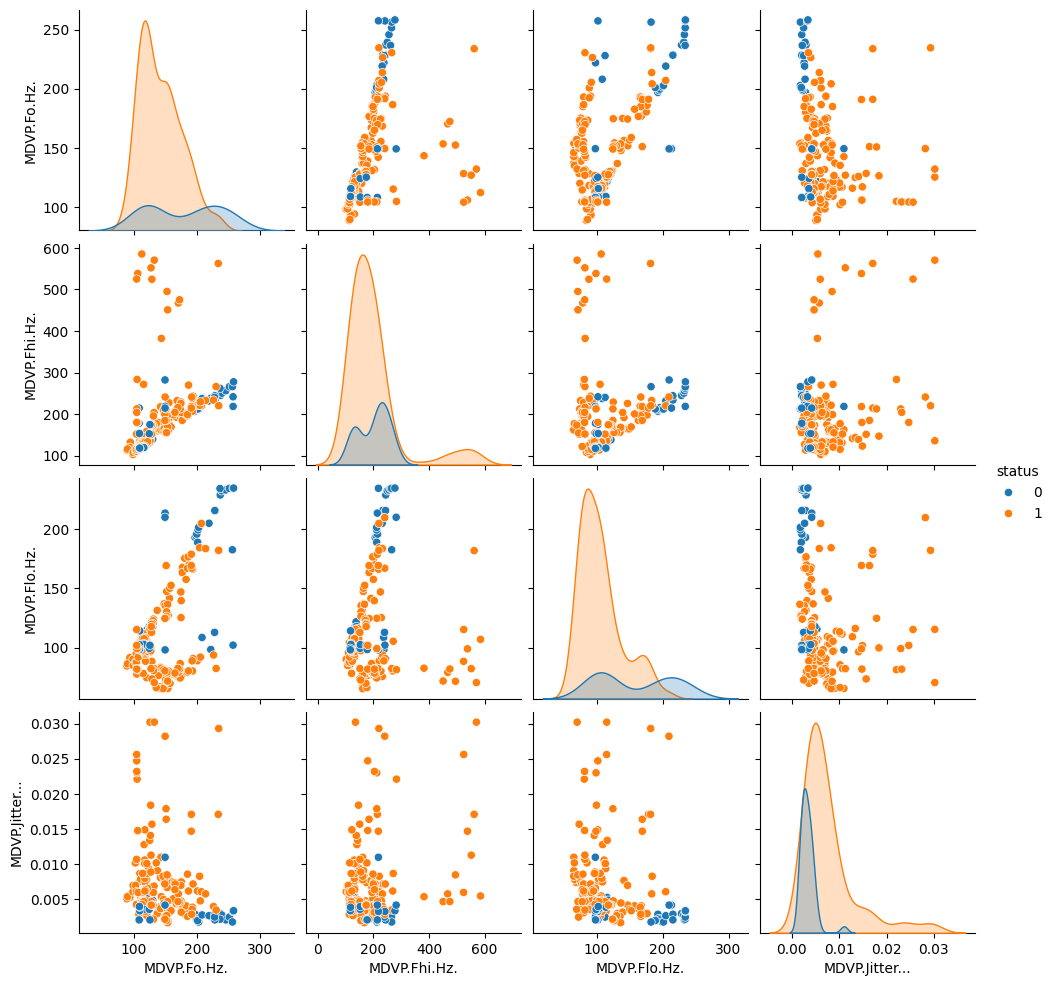

In [28]:
#pairplot
sns.pairplot(data_syn[['MDVP.Fo.Hz.',	'MDVP.Fhi.Hz.', 'MDVP.Flo.Hz.', 'MDVP.Jitter...', 'status']],
             hue="status")
plt.show()

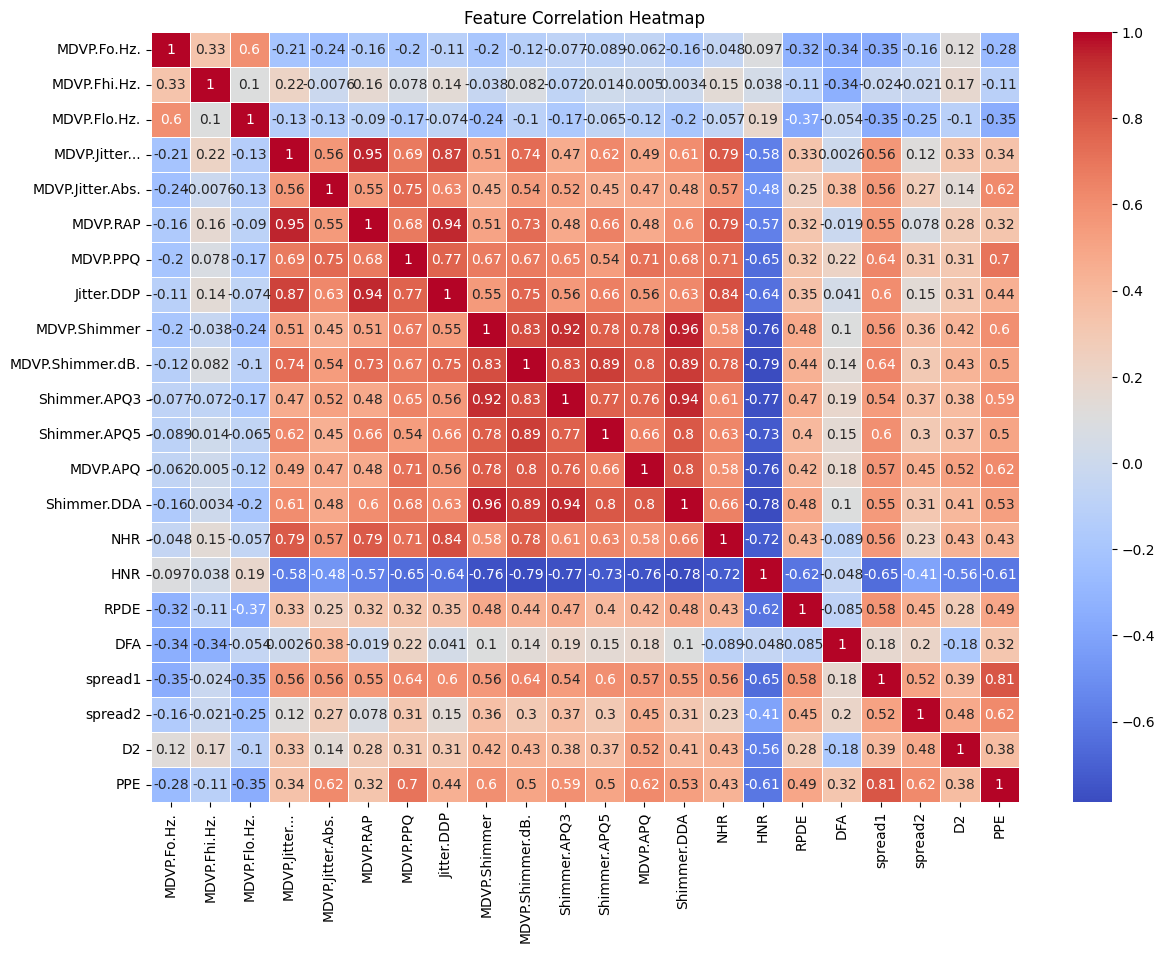

In [29]:
#Heat Map
plt.figure(figsize=(14,10))
sns.heatmap(data_syn.drop("status", axis=1).corr(), annot=True,linewidths=0.5, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()